In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [49]:
!pip install Pillow
!pip install numpy
!pip install matplotlib

In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch 
import torch.optim as optim
from torchvision import transforms, models

In [0]:
vgg = models.vgg19(pretrained=True).features

In [0]:
# freez paramters that we dont want to change
for param in vgg.parameters():
  param.requires_grad_(False)

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [0]:
## Load in Contenet and Style and Image

In [ ]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image


  Running setup.py bdist_wheel for olefile: started
  Running setup.py bdist_wheel for olefile: finished with status 'done'
  Stored in directory: C:\Users\ss\AppData\Local\pip\Cache\wheels\4b\f4\11\bc4166107c27f07fd7bba707ffcb439619197638a1ac986df3
Successfully built olefile


  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from PIL import Image

In [3]:
def load_image(img_path, max_size=400, shape=None):
  image =  Image.open(img_path).convert('RGB')
  
  if max(image.size) > max_size:
    size = max_size
  else:
    size = shape
  
  in_transform = transforms.Compose([
      transforms.Resize(size),
      transforms.ToTensor(),
      transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))
  ])
      
  image = in_transform(image)[:3,:,:].unsqueeze(0)
  return image

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



ModuleNotFoundError: No module named 'google'

In [126]:
ls "drive/My Drive/pytorch"

 ben_passmore.jpg   magritte.jpg    space_needle.jpg
 delaunay.jpg       octavia.jpg    'Style Transfer in Pytorch.ipynb'
 hockney.jpg        octopus.jpg
 kahlo.jpg          sotomayor.jpg


In [6]:
from PIL import Image

def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

ModuleNotFoundError: No module named 'PIL'

In [6]:
content = load_image('images/octopus.jpg')#.to(device)
style = load_image('images/hockney.jpg', shape=content.shape[-2:])#.to(device)


In [7]:
def im_convert(tensor):
  image = tensor.to("cpu").clone().detach()
  image = image.numpy().squeeze()
  iamge = image.transpose(1,2,0)
  iamge = iamge * np.array((0.229,0.224,0.225)) + np.array((0.495,0.456,0.406))
  image = image.clip(0,1)
  return image

TypeError: Invalid dimensions for image data

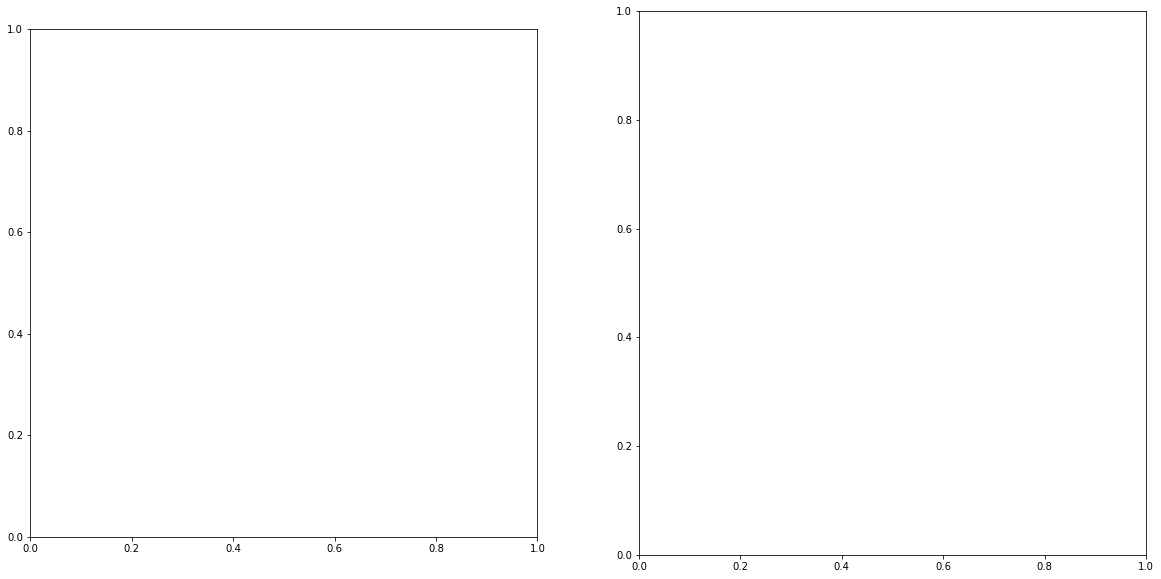

In [8]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# content and style ims side-by-side
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(style))

In [0]:
def get_features()

In [143]:
content.shape[-1]

592